In [1]:
import keras

C:\Users\Munna chowhan\Anaconda3\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os

In [3]:
train_cat_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\train\cats"

In [4]:
len(os.listdir(train_cat_dir))

1000

In [5]:
train_dog_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\train\dogs"

In [6]:
len(os.listdir(train_dog_dir))

1000

In [7]:
validation_cat_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\validation\cats"

In [8]:
len(os.listdir(validation_cat_dir))

500

In [9]:
validation_dog_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\validation\dogs"

In [10]:
len(os.listdir(validation_dog_dir))

500

In [11]:
from keras import models

In [12]:
from keras import layers

In [13]:
test_cat_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\test\cats"

In [14]:
len(os.listdir(test_cat_dir))

500

In [15]:
test_dog_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\test\dogs"

In [16]:
len(os.listdir(test_dog_dir))

500

In [17]:
model = models.Sequential()

In [18]:
model.add(layers.Conv2D(32, (3, 3 ), activation="relu",input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))

In [19]:
model.add(layers.Conv2D(64, (3, 3 ), activation="relu"))
model.add(layers.MaxPool2D((2,2)))

In [20]:
model.add(layers.Conv2D(128, (3, 3 ), activation="relu"))
model.add(layers.MaxPool2D((2,2)))

In [21]:
model.add(layers.Conv2D(128, (3, 3 ), activation="relu"))
model.add(layers.MaxPool2D((2,2)))

In [22]:
model.add(layers.Flatten())

In [23]:
model.add(layers.Dense(512, activation="relu"))

In [24]:
model.add(layers.Dense(1, activation="sigmoid"))

In [25]:
from keras import optimizers

In [26]:
model.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss = "binary_crossentropy", metrics=["accuracy"])

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\train"
validation_dir = r"C:\Users\Munna chowhan\Downloads\cats_and_dogs_small_ds\validation"

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_gen = train_datagen.flow_from_directory(train_dir,target_size=(150,150),class_mode="binary", batch_size=20)
validation_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), class_mode="binary", batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [78]:
for d_b, l_b in train_gen:
    print("data_batch:",d_b.shape)
    #print("data: ",d_b)
    print("label_batch:", l_b.shape)
    #print("labels: ", l_b)
    #print(type(l_b))
    break

data_batch: (20, 150, 150, 3)
data:  [[[[0.80392164 0.81568635 0.8352942 ]
   [0.83921576 0.85098046 0.8705883 ]
   [0.8352942  0.8470589  0.86666673]
   ...
   [0.09411766 0.0627451  0.05490196]
   [0.05882353 0.02745098 0.01960784]
   [0.0627451  0.06666667 0.04705883]]

  [[0.7686275  0.7803922  0.8000001 ]
   [0.8117648  0.8235295  0.8431373 ]
   [0.76470596 0.77647066 0.7960785 ]
   ...
   [0.1254902  0.09411766 0.08627451]
   [0.13333334 0.10196079 0.09411766]
   [0.14117648 0.10196079 0.09803922]]

  [[0.8196079  0.8313726  0.85098046]
   [0.8117648  0.8235295  0.8431373 ]
   [0.82745105 0.83921576 0.8588236 ]
   ...
   [0.09411766 0.07450981 0.0627451 ]
   [0.11764707 0.09803922 0.08627451]
   [0.20784315 0.15294118 0.15294118]]

  ...

  [[0.9450981  0.85098046 0.7490196 ]
   [0.94117653 0.8470589  0.74509805]
   [0.93725497 0.8431373  0.7411765 ]
   ...
   [0.3921569  0.37254903 0.36078432]
   [0.3921569  0.37254903 0.36078432]
   [0.00784314 0.00784314 0.        ]]

  [[0.91

In [32]:
history = model.fit_generator(train_gen,steps_per_epoch=100,validation_data=validation_gen,epochs=10,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 239s 2s/step - loss: 0.6927 - acc: 0.5190 - val_loss: 0.6781 - val_acc: 0.5550
Epoch 2/10
100/100 [==============================] - 238s 2s/step - loss: 0.6605 - acc: 0.6150 - val_loss: 0.6394 - val_acc: 0.6210
Epoch 3/10
100/100 [==============================] - 243s 2s/step - loss: 0.6105 - acc: 0.6620 - val_loss: 0.6005 - val_acc: 0.6920
Epoch 4/10
100/100 [==============================] - 241s 2s/step - loss: 0.5721 - acc: 0.6985 - val_loss: 0.5930 - val_acc: 0.6820
Epoch 5/10
100/100 [==============================] - 240s 2s/step - loss: 0.5282 - acc: 0.7400 - val_loss: 0.6087 - val_acc: 0.6610
Epoch 6/10
100/100 [==============================] - 240s 2s/step - loss: 0.5108 - acc: 0.7465 - val_loss: 0.6618 - val_acc: 0.6350
Epoch 7/10
100/100 [==============================] - 239s 2s/step - loss: 0.4737 - acc: 0.7715 - val_loss: 0.5972 - val_acc: 0.6880
Epoch 8/10
100/100 [==============================] - 244s 2s/step - 

In [33]:
model.save("cats_and_dogs_small_1.h5")

In [34]:
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

In [36]:
acc = history.history["acc"]

In [37]:
val_acc = history.history["val_acc"]

In [38]:
loss = history.history["loss"]

In [39]:
val_loss = history.history["val_loss"]

In [40]:
epochs = range(1, len(loss) + 1)

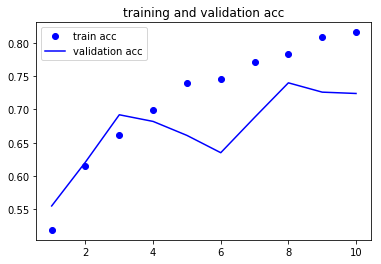

In [41]:
plt.plot(epochs, acc, "bo", label = "train acc")
plt.plot(epochs, val_acc, "b", label = "validation acc")
plt.legend()
plt.title("training and validation acc")
plt.show()

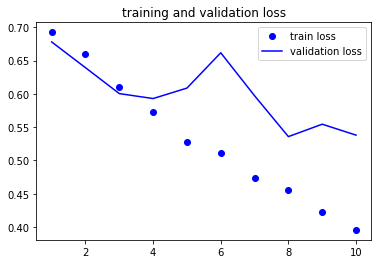

In [42]:
plt.plot(epochs, loss, "bo", label = "train loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.legend()
plt.title("training and validation loss")
plt.show()

In [44]:
from keras.preprocessing import image

In [119]:
datagen = ImageDataGenerator(rotation_range = 90, width_shift_range = 0.5, height_shift_range = 0.5, shear_range = 0.5,zoom_range = 0.5, horizontal_flip = True, fill_mode = "nearest")

In [46]:
fnames =[os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]

In [87]:
img_path = fnames[10]

In [89]:
img = image.load_img(img_path, target_size = (150, 150))

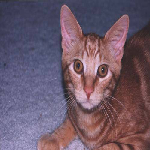

In [90]:
img

In [104]:
x = image.img_to_array(img)

In [106]:
x = x.reshape((1,) + x.shape)

In [108]:
i = 0

(1, 150, 150, 3)
(1, 150, 150, 3)


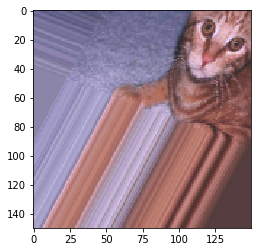

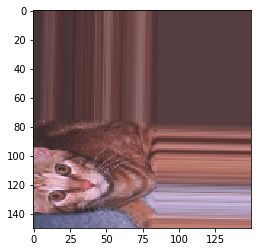

In [120]:
for batch in datagen.flow(x, batch_size = 1):
    print(batch.shape)
    plt.figure(i)
    
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        
        
        break
plt.show()